# Combining Face Detection and Recognition

In [5]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

def load_images_from_path(path, label):
    images,labels = [], []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20,20), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
x, y = [], []

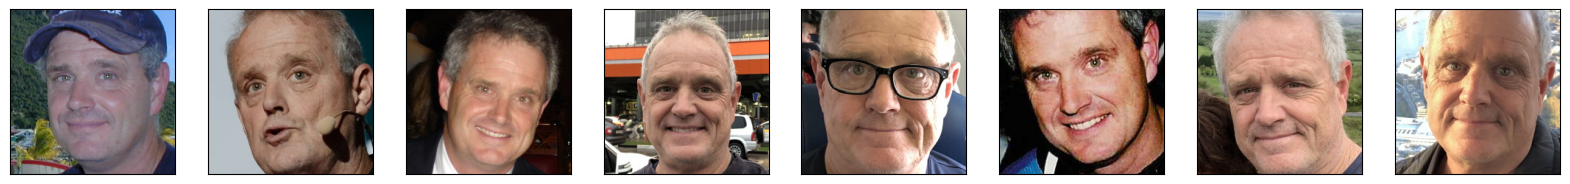

In [6]:
images, labels = load_images_from_path('faces/Jeff', 0)
show_images(images)

x += images
y += labels

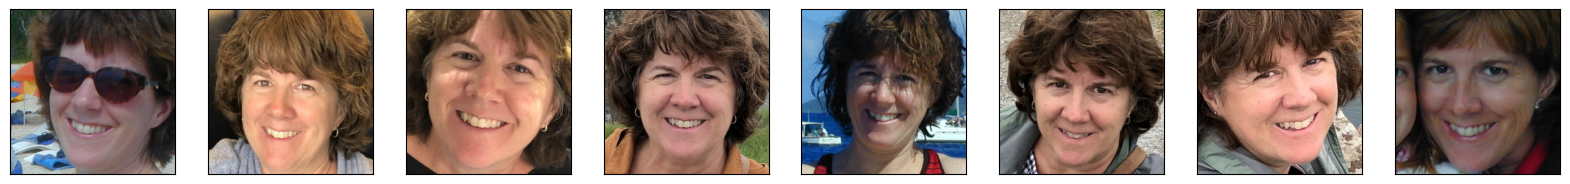

In [7]:
images, labels = load_images_from_path('faces/Lori', 1)
show_images(images)

x += images
y += labels

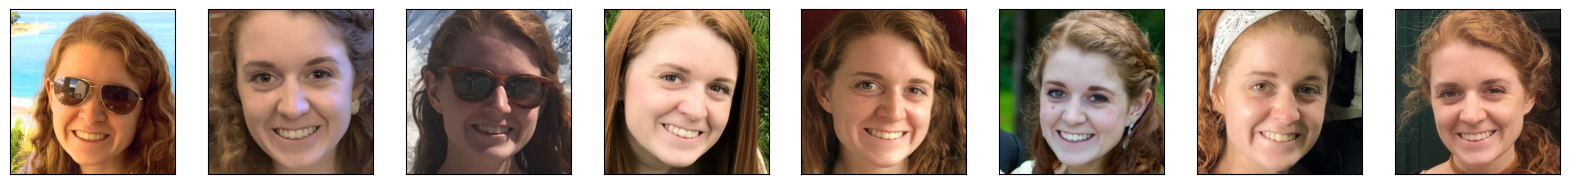

In [8]:
images, labels = load_images_from_path('faces/Abby', 2)
show_images(images)

x += images
y += labels

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import preprocess_input

faces = preprocess_input(np.array(x))
labels = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(faces, labels, train_size=0.5, stratify=labels, random_state=0)

In [11]:
from tensorflow.keras.models import load_model

base_model = load_model('vggface.h5')
base_model.trainable = False

TypeError: Error when deserializing class 'Conv2D' using config={'name': 'conv1/7x7_s2', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [7, 7], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Argument `name` must be a string and cannot contain character `/`. Received: name=conv1/7x7_s2 (of type <class 'str'>)